In [3]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame({'Category': ['a', 'b', 'c', 'd'], 'Values':[23, 46, 56, 78]})


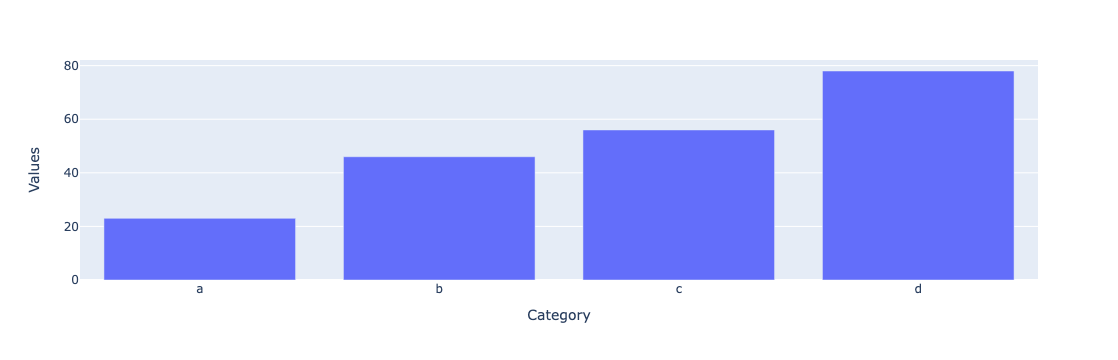

In [5]:
fig = px.bar(df, x='Category', y='Values')
fig.show()

In [6]:
ls

Untitled.ipynb  app1.py


In [7]:
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


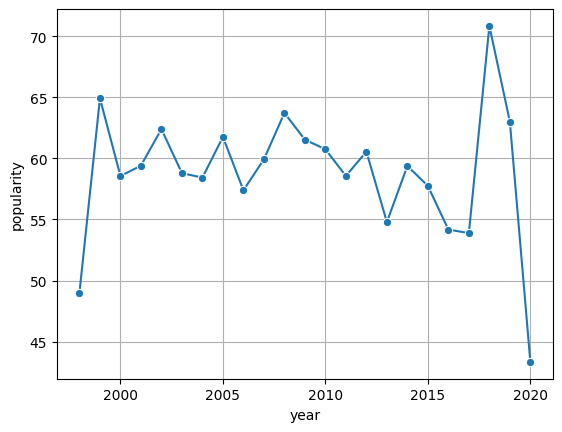

In [14]:
# Como a popularidade média das músicas mudou de 2000 a 2019?

pop_media = df.groupby('year')['popularity'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(pop_media, x='year', y='popularity', marker='o')
plt.grid()

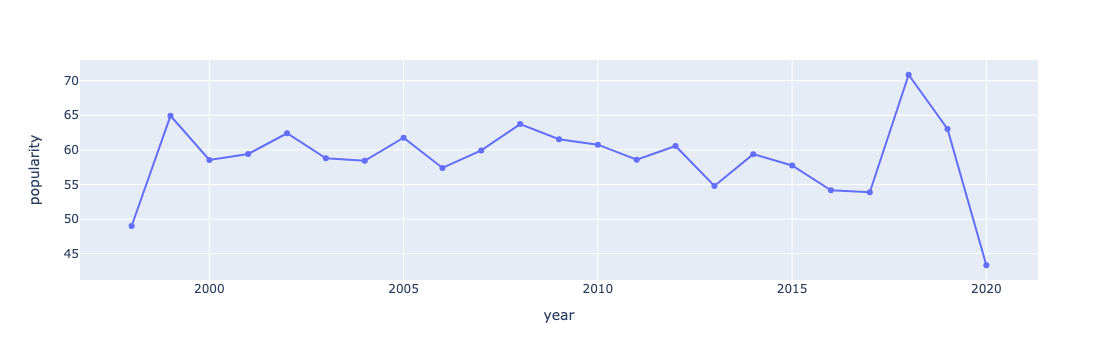

In [15]:
pop_media = df.groupby('year')['popularity'].mean().reset_index()

fig = px.line(pop_media, x='year', y='popularity', markers=True)
fig.show()

<Axes: xlabel='genre', ylabel='count'>

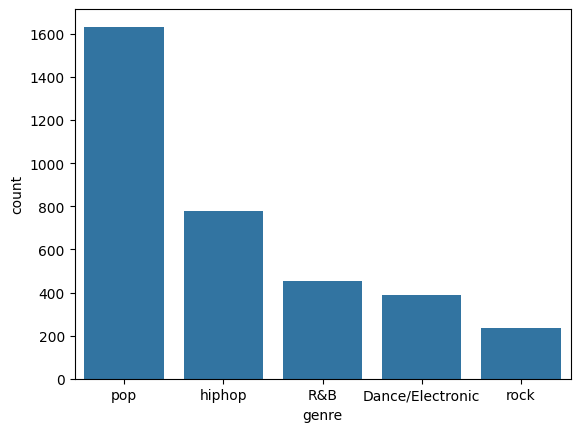

In [24]:
# Quais são os 5 gêneros mais comuns entre as principais faixas?
df_novo = df.copy()
df_novo['genre'] = df_novo['genre'].str.replace(' ', '').str.split(',')
df_novo = df_novo.explode('genre')

top_genres = df_novo['genre'].value_counts().head(5)

sns.barplot(data=top_genres)

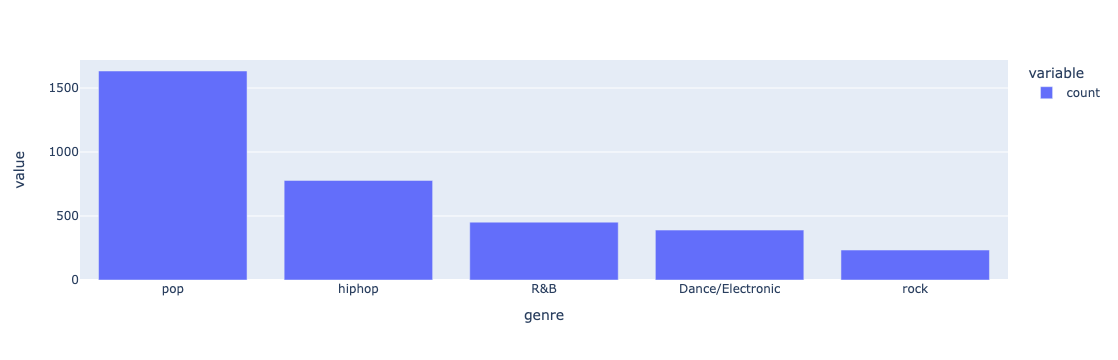

In [26]:
df_novo = df.copy()
df_novo['genre'] = df_novo['genre'].str.replace(' ', '').str.split(',')
df_novo = df_novo.explode('genre')

top_genres = df_novo['genre'].value_counts().head(5)

fig_genres = px.bar(top_genres)
fig_genres.show()

<Axes: xlabel='duration_min', ylabel='Count'>

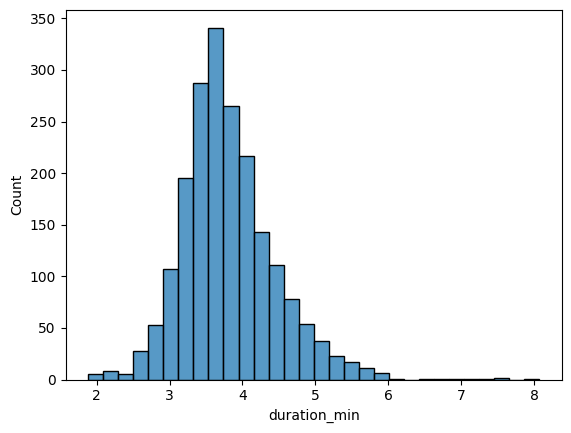

In [27]:
# Qual é a distribuição das durações das músicas entre as principais faixas do Spotify?

df['duration_min'] = df['duration_ms']/60000
sns.histplot(df['duration_min'], bins=30)

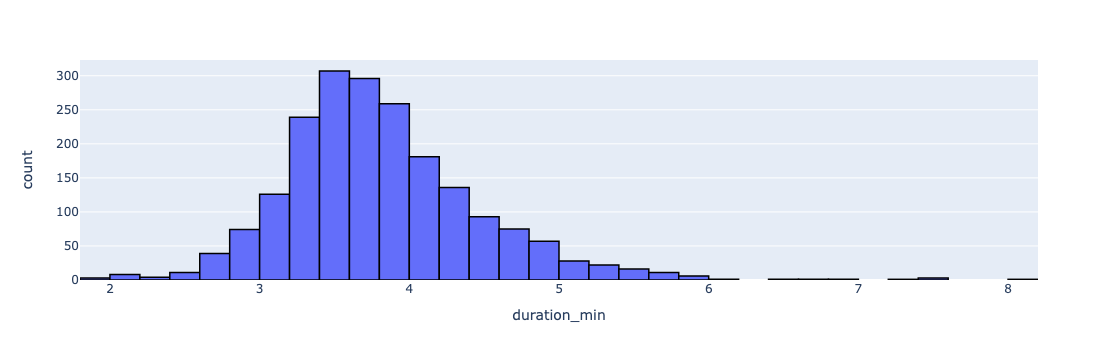

In [32]:
df['duration_min'] = df['duration_ms']/60000
fig_duration = px.histogram(df, x='duration_min', nbins=50)
fig_duration.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_duration.show()